In [2]:
#!/usr/bin/python

# Note to Kagglers: This script will not run directly in Kaggle kernels. You
# need to download it and run it on your local machine.

# Downloads images from the Google Landmarks dataset using multiple threads.
# Images that already exist will not be downloaded again, so the script can
# resume a partially completed download. All images will be saved in the JPG
# format with 90% compression quality.

import sys, os, multiprocessing, csv
from PIL import Image
from io import BytesIO
from urllib.request import urlopen
import tqdm
from tqdm import tnrange
from tqdm.contrib.concurrent import process_map

from matplotlib import pyplot as plt




def ParseData(data_file):
  csvfile = open(data_file, 'r')
  csvreader = csv.reader(csvfile)
  dataset = [line for line in csvreader]
  return dataset[1:]  # Chop off header


def DownloadImage(data):
  (key, url, label) = data

  try:
    response = urlopen(url)
    image_data = response.read()
    #print("read")
  except:
    #print('Warning: Could not download image %s from %s' % (key, url))
    return

  try:
    pil_image = Image.open(BytesIO(image_data))
    #print("parsed")
    return pil_image
  except:
    #print('Warning: Failed to parse image %s' % key)
    return


In [2]:
def Create_labels (data_file):
    dataset_url = ParseData(data_file)
    dataset = []
    for data in tqdm.tqdm(dataset_url[:len(dataset_url)], total=len(dataset_url)) :
        (key, url, label) = data 
        if label != "None" :
            dataset.append(int(label))
    return dataset

In [3]:
list_labels = Create_labels("train.csv")

100%|███████████████████████████████████████████████████████████████████| 1225029/1225029 [00:00<00:00, 1544611.98it/s]


In [4]:
len(list_labels)

1225029

In [5]:
max(list_labels)

14950

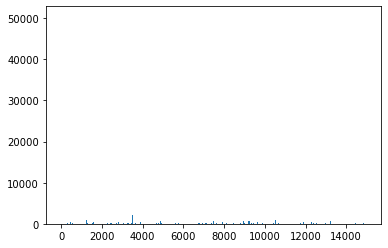

In [6]:
num_labels = plt.hist(list_labels, bins=range(max(list_labels)+2))

In [7]:
num_labels = num_labels[0]

In [8]:
max(num_labels)

50337.0

In [9]:
i= 0
nouv_lab = []
for j in tnrange(len(list_labels)) :
    if num_labels[list_labels[j]]>150 and num_labels[list_labels[j]]<300 :
        nouv_lab.append(list_labels[j])
list_labels = nouv_lab

C:\Users\stani\anaconda3\envs\modal\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  This is separate from the ipykernel package so we can avoid doing imports until


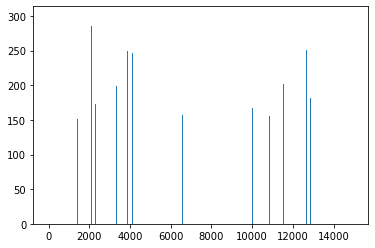

In [10]:
num_labels = plt.hist(list_labels, bins=range(14950+2))

In [11]:
num_labels = num_labels[0]

In [12]:
max(num_labels)

299.0

In [13]:
len(list_labels)

141156

In [14]:
compteur = 0
dataset_url = ParseData("train.csv")
image_per_label = [0]*(15000)
for data in tqdm.tqdm(dataset_url[:len(dataset_url)], total=len(dataset_url)):
    (key, url, label) = data
    if (label != "None") and (num_labels[int(label)]>150 and num_labels[int(label)]<300) and image_per_label[int(label)]<150 :
        image_per_label[int(label)]+=1
        compteur+=1
compteur

100%|████████████████████████████████████████████████████████████████████| 1225029/1225029 [00:01<00:00, 677135.04it/s]


101100

In [15]:
size = 120
dataset_url = ParseData("train.csv")

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

import PIL.Image as IMG

from imageio import imread
import glob

import torch
from torchvision.utils import save_image

matplotlib.rcParams['font.size'] = 18

In [17]:
%run preprocessing

In [18]:
def rescale_reshape(img, size):
    img_t = to_float32(img)
    img_t = rescale(img,size, size)
    return img_t

def ajout_transfo(img, high1=0.5, low1=0.1, high2=0.2, low2=0.05) :
    r,g,b = rgb(img) 
    bandw = rgb_to_bandw(img)
    vis_grad_g, vis_grad_b = vis_grad(bandw)
    vis_hessian_g, vis_hessian_b = vis_hessian(bandw)
    return [r,g,b,
                      vis_grad_g, vis_grad_b,
                      canny_edge_detection(bandw, high1, low1),
                      canny_edge_detection(bandw, high2, low2),
                      vis_hessian_g, vis_hessian_b]

In [19]:
"""
image_per_label = multiprocessing.Array('i', [0]*(15000))


def create_and_register(t):
    i,data = t
    (key, url, label) = data
    if (label != "None") and (num_labels[int(label)]>150 and num_labels[int(label)]<300) and image_per_label[int(label)]<150 :
        pil_image = DownloadImage(data)
        if pil_image!= None :
            pil_image = np.array(pil_image)
            image_per_label[int(label)]+=1
            pil_image = rescale_reshape(pil_image, size)
            pil_image_li = ajout_transfo(pil_image)
            couche = 0
            for img in pil_image_li :
                save_image(torch.from_numpy(img),"/home/xavierdurand/transsup150/" + str(i) + 'l' + str(label) + 'c' + str(couche) +".png")
                couche += 1
            

def CreateDataset(data_file, num_labels):
    arg = [(i,dataset_url[i]) for i in range(len(dataset_url))]
    with multiprocessing.Pool() as p :
        list(tqdm.tqdm(p.imap(create_and_register, arg), total=len(dataset_url)))
"""

'\nimage_per_label = multiprocessing.Array(\'i\', [0]*(15000))\n\n\ndef create_and_register(t):\n    i,data = t\n    (key, url, label) = data\n    if (label != "None") and (num_labels[int(label)]>150 and num_labels[int(label)]<300) and image_per_label[int(label)]<150 :\n        pil_image = DownloadImage(data)\n        if pil_image!= None :\n            pil_image = np.array(pil_image)\n            image_per_label[int(label)]+=1\n            pil_image = rescale_reshape(pil_image, size)\n            pil_image_li = ajout_transfo(pil_image)\n            couche = 0\n            for img in pil_image_li :\n                save_image(torch.from_numpy(img),"/home/xavierdurand/transsup150/" + str(i) + \'l\' + str(label) + \'c\' + str(couche) +".png")\n                couche += 1\n            \n\ndef CreateDataset(data_file, num_labels):\n    arg = [(i,dataset_url[i]) for i in range(len(dataset_url))]\n    with multiprocessing.Pool() as p :\n        list(tqdm.tqdm(p.imap(create_and_register, arg),

In [20]:
 image_per_label = multiprocessing.Array('i', [0]*(15000))


def create_and_register(t):
    i,data = t
    (key, url, label) = data
    if (label != "None") and (num_labels[int(label)]>150 and num_labels[int(label)]<300) and image_per_label[int(label)]<150 :
        pil_image = DownloadImage(data)
        if pil_image!= None :
            pil_image = np.array(pil_image)
            if len(pil_image.shape) < 3 :
                return
            image_per_label[int(label)]+=1
            pil_image = rescale_reshape(pil_image, size)
            pil_image_li = ajout_transfo(pil_image)
            couche = 0
            for img in pil_image_li :
                img = img.reshape((size, size))
                plt.imsave("testpre" + str(i) + 'l' + str(label) + 'c' + str(couche) +".png", img, cmaps = 'Greys')
                couche += 1
            

def CreateDataset(data_file, num_labels):
    arg = [(i,dataset_url[i]) for i in range(len(dataset_url))]
    with multiprocessing.Pool() as p :
        list(tqdm.tqdm(p.imap(create_and_register, arg), total=len(dataset_url)))

In [ ]:
size=60

CreateDataset("train.csv", num_labels)

  0%|                                                                                      | 0/1225029 [00:00<?, ?it/s]

In [26]:
a = np.array([[1]])
b = np.array([[0,0]])

c = np.concatenate([a,b],axis = 1)

In [27]:
c

array([[1, 0, 0]])

In [22]:
a[0] = 2

In [24]:
empty = np.zeros([1,3])

In [25]:
empty

array([[0., 0., 0.]])

In [19]:
empty[:,0] = a[:]

ValueError: could not broadcast input array from shape (3) into shape (2)